<table style="float:left">
    <tr>
        <td>
            <img src="emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
        </td>
        <td style="padding-bottom:10px; text-align:left;">
            <h1 style="border-bottom: 1px solid #eeeeee;"> Python BootCamp </h1><br/>
            <span style="display:inline-block; margin-top:-15px;">
            <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS)    
            <br/>
            Sep 2024, Paris | © Saeed VARASTEH [RP] | Jean SAVINIEN
            </span>
        </td>
    </tr>
</table>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 05 </h4>
    </span>
</div>

In [ ]:
Name = ""

### Homework 05 - Beauty Products

The aim of this exercise is to assess your ability to apply your newly acquired coding skills to a __practical/real-world__ project.

Our goal is __data exploration__, not modeling.

---

<div style="color:gray; background-color:#eeeeee">
    Dataset description
</div>
<br/>

The __beautyproducts.csv__ file contains information on beauty products sold in more than thirty thousand Amazon stores over the past 23 years. It includes the following features for each product:

- __title__: Name of the product.
- __average_rating__: Rating of the product shown on the product page.
- __rating_number__: Number of ratings in the product.
- __features__: Features of the product.
- __description__: Description of the product.
- __images__: Images of the product. Each image has different sizes (thumb, large, hi_res).
- __store__: Store name of the product.
- __details__: Product details, including materials, brand, sizes, etc.

Lets read the file into a Pandas DataFrame to get a first impression.

In [146]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas Options
pd.set_option("display.max_rows", 50)

In [148]:
df = pd.read_csv('beautyproducts.csv')
print(df.shape)
df.head(5)


(112590, 8)


,title,average_rating,rating_number,features,description,images,store,details
0,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Howard Products,{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...
1,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Yes To,"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro..."
2,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Levine Health Products,{'Manufacturer': 'Levine Health Products'}
3,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,Cherioll,"{'Brand': 'Cherioll', 'Item Form': 'Powder', '..."
4,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"['Material: 304 Stainless Steel; Brass tip', '...",['The Precision Plunger Bars are designed to w...,[{'thumb': 'https://m.media-amazon.com/images/...,Precision,{'UPC': '644287689178'}


In [149]:
df.columns

Index(['title', 'average_rating', 'rating_number', 'features', 'description',
       'images', 'store', 'details'],
      dtype='object')

You need to know that working with real-world data is not as straightforward as it was in the classroom with mostly synthetic/clean data sets. 

Most of the time you will be working with large datasets like this one. Or you will be dealing with columns such as __features__, __description__, __images__, and __details__ that contain multiple values as a list or dictionary, which will add another layer of data processing as we work with these columns. 

For example, let us select a product from the "Estee Lauder" store and see what we have on it. e.g. index 4249.

In [151]:
idx = 6
df.iloc[idx] # show a unique row, the format is "Series"

title             Stain Bonnet For Baby Bonnet Silk Sleep Cap Fo...
average_rating                                                  4.1
rating_number                                                    50
features                                                         []
description                                                      []
images            [{'thumb': 'https://m.media-amazon.com/images/...
store                                                      Edoneery
details           {'Brand': 'Edoneery', 'Material': 'Silk', 'Num...
Name: 6, dtype: object

In [152]:
# title
df.iloc[idx].title

'Stain Bonnet For Baby Bonnet Silk Sleep Cap For Toddler Child Shower Cap Teens Kids'

In [153]:
for idx in range(5):  # show 5 rows products and with  series format
    print(df.iloc[idx])
    

title             Howard LC0008 Leather Conditioner, 8-Ounce (4-...
average_rating                                                  4.8
rating_number                                                    10
features                                                         []
description                                                      []
images            [{'thumb': 'https://m.media-amazon.com/images/...
store                                               Howard Products
details           {'Package Dimensions': '7.1 x 5.5 x 3 inches; ...
Name: 0, dtype: object
title             Yes to Tomatoes Detoxifying Charcoal Cleanser ...
average_rating                                                  4.5
rating_number                                                     3
features                                                         []
description                                                      []
images            [{'thumb': 'https://m.media-amazon.com/images/...
store                    

Titles are stored as __text__ exactly as we can find them on the Amazon webpage.

In [155]:
# average_rating and rating_number

df.iloc[idx].average_rating, df.iloc[idx].rating_number

(4.3, 7)

The average rating and rating number columns have __numeric__ values.

In [163]:
df.iloc[54].details

"{'Brand': 'Neutral', 'Item Form': 'Wax', 'Unit Count': '1.00 Count', 'Material Feature': 'Natural', 'Package Dimensions': '2.83 x 2.83 x 2.05 inches; 5.29 Ounces', 'UPC': '718893086086'}"

In [165]:
# features
df.iloc[idx].features

"['Material: 304 Stainless Steel; Brass tip', 'Lengths Available: 88mm, 93mm, 98mm', 'Accepts cartridge needles with vice style tattoo machines', 'Works perfectly with Precision Disposable Soft Cartridge Grips', 'Price per one bag of 10 plungers']"

Features should be stored as a __list of strings__. But if you look closely, the output is also quoted. That means the type is string. We need to fix this because we want the output to be a list so that we can select an element from it.

<span style="color:crimson">Note:</span> This problem is common in real-world data sets.

To convert these strings into actual Python lists, you can use `ast.literal_eval()` from the `ast` module, which safely evaluates strings containing Python expressions and converts them to the corresponding data type. Here's how you can apply it:

In [168]:
import ast
ast.literal_eval( df.iloc[idx].features ) #字面意義

['Material: 304 Stainless Steel; Brass tip',
 'Lengths Available: 88mm, 93mm, 98mm',
 'Accepts cartridge needles with vice style tattoo machines',
 'Works perfectly with Precision Disposable Soft Cartridge Grips',
 'Price per one bag of 10 plungers']

Good! You can simply apply this function to the entire column to convert the values from strings (objects) to lists.

In [171]:
df["features"] = df["features"].apply(ast.literal_eval) #用apply function 去apply another function

Let us check our previous code again:

In [174]:
# features
df.iloc[idx].features

['Material: 304 Stainless Steel; Brass tip',
 'Lengths Available: 88mm, 93mm, 98mm',
 'Accepts cartridge needles with vice style tattoo machines',
 'Works perfectly with Precision Disposable Soft Cartridge Grips',
 'Price per one bag of 10 plungers']

Voila! Lets do this for __description__, __images__ and __details__ columns as well.

In [177]:
df["description"] = df["description"].apply(ast.literal_eval)
df["images"] = df["images"].apply(ast.literal_eval)
df["details"] = df["details"].apply(ast.literal_eval)

In [178]:
# description
df.iloc[idx].description


['The Precision Plunger Bars are designed to work seamlessly with the\xa0Precision Disposable 1. 25" Contoured Soft Cartridge Grips\xa0and the\xa0Precision Disposable 1" Textured Soft Cartridge Grips\xa0to drive cartridge needles with vice style or standard tattoo machine setups. These plunger bars are manufactured from 304 Stainless Steel and feature a brass tip. The plungers are sold in a bag of ten in your choice of 88mm, 93mm, or 98mm length.']

In [179]:
# images
df.iloc[idx].images

[{'thumb': 'https://m.media-amazon.com/images/I/31TgqAZ8kQL._SS40_.jpg',
  'large': 'https://m.media-amazon.com/images/I/31TgqAZ8kQL.jpg',
  'variant': 'MAIN',
  'hi_res': None}]

Image information is stored as a __list of dictionaries__. For each image we have four features (thumb, large, variant, hi_res) in a dictionary-style format. For example, to get the high resolution version of the first image, we can write:

In [181]:
df.iloc[idx].images[0]["hi_res"]

Click the link to see how reliable the links are in this dataset.

In [183]:
# details
df.iloc[idx].details

{'UPC': '644287689178'}

The data in this column is stored as a __dictionary__. 

This column stores many details about the product and it is different from one product to another! change the __idx__ to see for yourself.

---

<div style="color:gray; background-color:#eeeeee">
    Your Task
</div>

You are a data analyst in a startup company targeting the beauty market. You are not given a specific task to do! Your job is to extract as much information as you can from this dataset to help your company's marketing strategies.

Here are some questions you can answer.

- How many stores are in the dataset? 
- Which stores sell the most number of items?
- How many brands are selling items in the dataset?
- Which brands have the highest ratings? 
- Which products have the highest average rating? List the top 50. Use products with number of rating greater than 1000.
- Do these top-rated products share common characteristics?
- Display images and print details of the top 10 highest-rated products.
- What will be a good marketing strategy when your company launches its first product?

Add at least __7__ more questions of your choice to this list and try to answer them.

Comment/document everything.

# 1. How many stores are in the dataset?

In [189]:
 stores=df['store'].value_counts()
stores
# Answer: length means unique store: 30761

store
Bath & Body Works    481
WILLBOND             388
Hairro               381
Generic              369
S-noilite            340
                    ... 
STAUB                  1
YUATCYA                1
starbuzz               1
Heladerm               1
DVIO                   1
Name: count, Length: 30761, dtype: int64

---

# 2. Which stores sell the most number of items?


In [192]:
# Answer: same above. I can see that "Bath & Body Works" has  481 rows on the top, meaning have the most products 

# 3. How many brands are selling items in the dataset? 

In [194]:
def extract_brand(details):
    return details.get('Brand','None') # extract the KEY: brand, return its VALUE; otherwise, print None

#create BRAND column, apply the function created EXTRACT_BRAND to each rows detail and put in BRAND column
df['brand'] = df['details'].apply(extract_brand)

#count unique brands  with nunique()
unique_brands = df['brand'].nunique()

unique_brands

# Answer: Number of unique brands: 22,962-1 = 22,961
# minus -1  means deducting the "None" value which doesn't have the KEY:brand 


22962

# 4. Which brands have the highest ratings? 

df['brand'] = df['details'].apply(extract_brand)


In [196]:
# Step 1: know which score is the highest 
df['average_rating'].max() 

5.0

In [197]:
# Step 2: check if there is null value in brnad column: clean data first
print(df['brand'].isnull().sum()) 

0


In [198]:
# Step 3: select the brands have score 5, and don't select the NONE from the brand column 
# my own note: df.loc[row condition wanted, column name want to be shown]

high=df.loc[(df['average_rating']==5)&(df['brand']!='None'),'brand'].unique()
print(f"There are many brands such as {high} and total have: {len(high)}brands")

#Answer: the brands below which have at least one product having the score equal to 5, meaning the highest ratings  
## Note for Saeed: your question looks a bit amigiuous. 
# I don't know if you meant which brands have the highest ratings "Amoung all their products in terms of average ratings" or you meant what I wrote in the coding.
# I assume that there are two interpretation. I just pick one to write. 


There are many brands such as ['Dionis' 'House of Armáf' 'Gojo' ... 'MuLier' 'Hongo' 'KAIQIKAIXI'] and total have: 4590brands


# 5. Which products have the highest average rating? List the top 50. Use products with the number of ratings greater than 1000.

In [200]:
df[df['rating_number'] > 1000] # df[] support boolean, therefore only true will be kept. 
bigger_than_1000=df[df['rating_number'] > 1000]

select_product= bigger_than_1000.sort_values(by="average_rating",ascending=False)
select_product.head(50)

# Product "100 letterpress note card..." and "Corn Huskers Lotion 7 Oz" have the highest average rating

,title,average_rating,rating_number,features,description,images,store,details,brand
63448,100 Letterpress Note Cards and Self Seal Envel...,4.9,2322,[SELF SEAL ENVELOPES: Perfect for bulk mailing...,"[Luxury Note Cards at an Affordable Price, Sho...",[{'thumb': 'https://m.media-amazon.com/images/...,Opie's Paper Co.,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",None
33374,Corn Huskers Lotion 7 oz ( Pack of 4),4.9,1027,"[Moisturizes and softens dry skin, Soothes irr...",[4 Bottles of CORN HUSKERS LOTION 7 oz OIL F...,[{'thumb': 'https://m.media-amazon.com/images/...,Johnson & Johnson,"{'Brand': 'Johnson & Johnson', 'Item Form': 'L...",Johnson & Johnson
95465,Graham Sanek Neck Strips- 2.5 x 17.5-12 pks w/...,4.8,1662,"[Made of a soft, highly absorbent tissue, Neck...",[Graham Sanek Neck Strips 720 Strips/ pk],[{'thumb': 'https://m.media-amazon.com/images/...,Graham Professional,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",None
76279,Tigi Bed Head Manipulator 2oz (3 PACK),4.8,1260,[tigi],[],[{'thumb': 'https://m.media-amazon.com/images/...,TIGI,"{'Product Benefits': 'Frizz Control', 'Hair Ty...",None
93953,"1"" Metallic Red, Silver & Blue Stars Shape Foi...",4.8,12203,[],[ASIN020],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin020', 'Size': 'ASIN020', 'Brand...",Garage Sale Pup
63417,"2-1/4"" x 1-1/4"" Chalkboard Black Paper Label S...",4.8,10913,[],[ASIN007],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin007', 'Size': 'ASIN007', 'Brand...",Garage Sale Pup
15974,Janeke Superbrush Brush (Green/Purple - 86SP22...,4.8,1708,[Flexible bristles gently massage the scalp. E...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Jäneke,"{'Brand': 'Jäneke', 'Color': 'Green,Purple', '...",Jäneke
3954,Self Adhesive Tape - Yuelong 24Pack 2” x 5 Yar...,4.8,1406,[HIGH GRADE MATERIAL - The cohesive bandage wr...,[],[{'thumb': 'https://m.media-amazon.com/images/...,Yuelong,{'Package Dimensions': '9.5 x 7.2 x 4.6 inches...,None
63206,"1.5"" Heart Shape Kraft Paper Thank You Adhesiv...",4.8,10913,[],[ASIN001],[{'thumb': 'https://m.media-amazon.com/images/...,Garage Sale Pup,"{'Color': 'Asin001', 'Size': 'ASIN001', 'Brand...",Garage Sale Pup
77291,Hibiclens Antiseptic & Antimicrobial Skin Clea...,4.8,2140,"[Non-flammable formula, Less-irritating than o...",[Skin wound and general skin cleansing: Thorou...,[{'thumb': 'https://m.media-amazon.com/images/...,YYOJ,"{'Item Form': 'Liquid', 'Brand': 'YYOJ', 'Mate...",YYOJ


# 6. Do these top-rated products share common characteristics?


In [214]:
df[df['rating_number'] > 1000] # df[] support boolean, therefore only true will be kept. 
bigger_than_1000=df[df['rating_number'] > 1000]

select_product= bigger_than_1000.sort_values(by="average_rating",ascending=False)
top_50=select_product.head(50)

top_50['details']

#save it in excel to analyze the top 50 products' detail column 
top_50['details'].to_csv('top_50_detail2.csv',index=True)



# Ans: 1. 38 out of 50 products have brand names. 2. And 48 products out of the top 50 have a "dimension" description. 

# 7. Display images and print details of the top 10 highest-rated products.

In [217]:
# Display image 
df[df['rating_number'] > 1000] # df[] support boolean, therefore only true will be kept. 
bigger_than_1000=df[df['rating_number'] > 1000]

select_product= bigger_than_1000.sort_values(by="average_rating",ascending=False)
top_10=select_product.head(10)


result=[]
for i in range(10):
    result.append(top_10.iloc[i].images[0]["large"])

print(result)



['https://m.media-amazon.com/images/I/419oi-H1DeL.jpg', 'https://m.media-amazon.com/images/I/51+2zxwHeVL.jpg', 'https://m.media-amazon.com/images/I/51fgG25z54L.jpg', 'https://m.media-amazon.com/images/I/41jsKEc4oxL.jpg', 'https://m.media-amazon.com/images/I/41zaWbYxhVL.jpg', 'https://m.media-amazon.com/images/I/31-UbgiAYXL.jpg', 'https://m.media-amazon.com/images/I/415CgZExO1L.jpg', 'https://m.media-amazon.com/images/I/61Gbqzg-NBL.jpg', 'https://m.media-amazon.com/images/I/41NWun9k+oL.jpg', 'https://m.media-amazon.com/images/I/51e0vdzIfGL.jpg']


In [219]:
# Print top 10 details. 

# option 1: see only the beggining
top_10["details"]


63448    {'Is Discontinued By Manufacturer': 'No', 'Pro...
33374    {'Brand': 'Johnson & Johnson', 'Item Form': 'L...
95465    {'Is Discontinued By Manufacturer': 'No', 'Pac...
76279    {'Product Benefits': 'Frizz Control', 'Hair Ty...
93953    {'Color': 'Asin020', 'Size': 'ASIN020', 'Brand...
63417    {'Color': 'Asin007', 'Size': 'ASIN007', 'Brand...
15974    {'Brand': 'Jäneke', 'Color': 'Green,Purple', '...
3954     {'Package Dimensions': '9.5 x 7.2 x 4.6 inches...
63206    {'Color': 'Asin001', 'Size': 'ASIN001', 'Brand...
77291    {'Item Form': 'Liquid', 'Brand': 'YYOJ', 'Mate...
Name: details, dtype: object

In [221]:
# option 2 : see all sentences 
df[df['rating_number'] > 1000] # df[] support boolean, therefore only true will be kept. 
bigger_than_1000=df[df['rating_number'] > 1000]

select_product= bigger_than_1000.sort_values(by="average_rating",ascending=False)
top_10=select_product.head(10)


result=[]
for i in range(10):
    result.append(top_10.iloc[i].details)
    
print(result)

[{'Is Discontinued By Manufacturer': 'No', 'Product Dimensions': '11.5 x 4.2 x 5.2 inches; 3.24 Pounds', 'UPC': '648499871505', 'Manufacturer': "Opie's Paper Co."}, {'Brand': 'Johnson & Johnson', 'Item Form': 'Lotion', 'Unit Count': '28 Fl Oz', 'Number of Items': '4', 'Use for': 'Whole Body', 'Is Discontinued By Manufacturer': 'No', 'Product Dimensions': '2.57 x 1.25 x 6.75 inches; 8 Ounces', 'Item model number': 'Hand Lotion', 'UPC': '885830512752 312547481274', 'Manufacturer': 'Johnson & Johnson'}, {'Is Discontinued By Manufacturer': 'No', 'Package Dimensions': '8.19 x 5.98 x 4.84 inches; 3.31 Pounds', 'Item model number': '43310E', 'UPC': '794437488363', 'Manufacturer': 'Graham Professional'}, {'Product Benefits': 'Frizz Control', 'Hair Type': 'All', 'Material Type Free': 'Benzyl Alcohol', 'Scent': 'tropical', 'Liquid Volume': '2 Fluid Ounces', 'Is Discontinued By Manufacturer': 'No', 'Product Dimensions': '2 x 2 x 2 inches; 8.64 Ounces', 'Item model number': '942110', 'UPC': '78773

# 8.What will be a good marketing strategy when your company launches its first product?

Ans: Lol don't judge me. But if I have enough budget, I will go and "BUY" some comments with good ratings in the beginning as the base, especially for the first product. The reason is normally customers never see your brand even your product. It is hard to make them buy especially when you don't have any comments and ratings. However, once I have the base of the review and rating number. It will be easier to sell my product.

But firstly, I need to put more details in the "details column" part, as I explored previously in Top 50 products, the result showed efficient to higher conversion rate. And also need to put more description one the product.

Secondly, I need to put clear images or high-resolution images to let customers have a better impression and visual-info. 

To sum up, the three most important elements and strategy are: 
1. A sufficient number of ratings with good scores
2. Detailed and elaborate product information
3. Also put the appealing description 
4. High-resolution images


# * Own questions below: 

# 9.How many products have descriptions amoung Top 50 highest average rating? 

In [227]:
# To see if having a description is a critical factor to be in Top 50 highest average rating.  
top_50_with_desc = top_50['description'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False).sum()

top_50_with_desc

#Ans: Only almost half (24 out of 50) of products have descriptions. It is kind of not mandatory to have it 

24

# 10 Which stores have AVERAGE ratings lower than 3 ? We need to look into it or talk to owner 

In [230]:
# Step 1 : group by store and calculate mean average_rating
lowest_score_store = df.groupby('store')['average_rating'].mean()

# Step 2: the scores lower than 3, must be considered to be deleted from AMAZON
stores_lower_3 = lowest_score_store[lowest_score_store < 3]
From_low_to_high = stores_lower_3.sort_values(ascending=True)

# Step 3: At least talk to the vendor or store owner for these 1000 stores that don't have good performance
From_low_to_high.head(1000) 


store
(3 Pack) MILANI Fierce Foil Eyeliner - Navy Foil …    1.0
Newborn Coin                                          1.0
Nizi Jewelry                                          1.0
Charter Inc                                           1.0
Charme                                                1.0
                                                     ... 
Deuiosna                                              2.3
Urrtreusor                                            2.3
Superhairpieces                                       2.3
Kaia Naturals                                         2.3
Suntee                                                2.3
Name: average_rating, Length: 1000, dtype: float64

# 11. Is there any relation between the average rating socre and number of ratings?

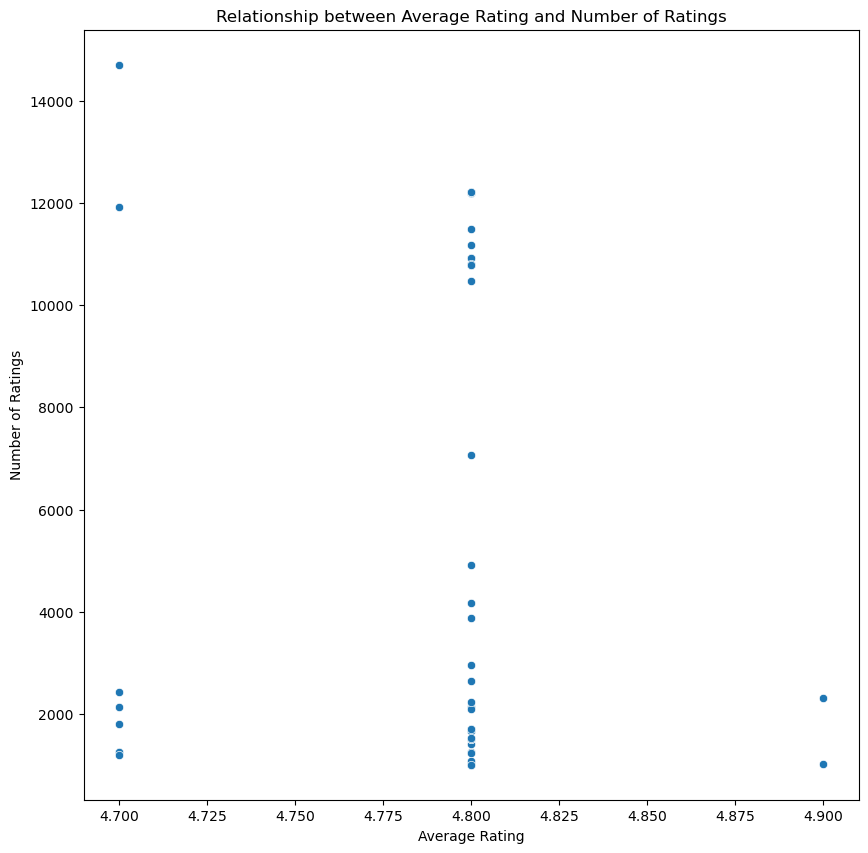

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(data=top_50, x='average_rating', y='rating_number')
plt.title('Relationship between Average Rating and Number of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Ans: The result shows that there is no correlation between the average rating score and the number of ratings. 
# It's not at all a linear regression model. 

# 12 .Does number of images influence the average_rating?

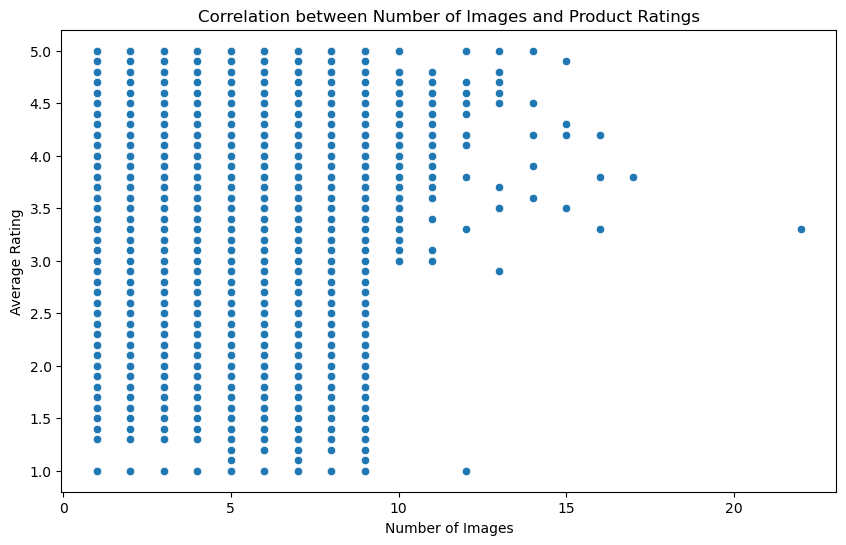

In [233]:
# I am wondering if the images affect the average rating and purchase numbers. Somehow, customers can't leave a rating without buying products. 

# check if image is saved list format, if yes count it, if not enter 0 
df['num_images'] = df['images'].apply(lambda x: len(x) if isinstance(x, list) else 0) 

# Create a scatter plot to show the correlation between the number of images and average ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_images', y='average_rating')
plt.title('Correlation between Number of Images and Product Ratings')
plt.xlabel('Number of Images')
plt.ylabel('Average Rating')
plt.show()

# Ans: Yes, indeed, it affects the average rating score. As you can see, images with a number greater than ten only have higher scores. 

# 13 Count the number of image which is less than 3 images and its percentage ? 


In [509]:
# count number of image for each product, if there is no then return 0 
df['num_images'] = df['images'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# select numbers < 3 
few_images_products = df[df['num_images'] < 3]

# count
count_few_images = len(few_images_products)

print(count_few_images)


total_products = len(df)

percentage_few_images = (count_few_images / total_products) * 100

percentage_few_images

# number of images is 33557
# The percentage among all products is 29.8%

# Ans: Means it is the trend or common behavior for vendors to upload more images (>3) to attract customers.

33557


29.804600763833378

# 14. How many products are higher than average score ratings for a rating number more than 30? What is the percentage among all products ?


The reason why I use rating numbers more than 30 is based on the Applied statistics course, the sample size needs to be over 30 can be considered big enough to follow the  normal distribution theory. 


In [512]:
# step 1: calculate the average rating
average_rating = df['average_rating'].mean()

# step 2: Filter higher than the average and rating_number > 30
filtered_products = df[(df['average_rating'] > average_rating) & (df['rating_number'] > 30)]

# Count 
count= len(filtered_products)

# Calculate the percentage
percentage_filtered_products = (count/ len(df)) * 100

print(count)
percentage_filtered_products


# Ans: Number of products with a rating higher than the average and rating_number: 18976
# Ans: Percentage of such products among all products: 16.85%


18976


16.85407229771738

# 15.  I want to know if the column STORE are exactly the same as Brand(Key value pair) info in the column DETAILS


In [514]:
# step 1: in Question 3, I already extract Brand name from detail column and save data is new column called "Brand"

# Step 2: create another column to save if the extracted brand same as stores name
df['is_store_same_as_extracted_brand'] = df['store'] == df['brand']

# Step 3: Count how many rows have the same name in stores (extracted brand name in original detail column) 
count = df['is_store_same_as_extracted_brand'].sum()

print(f"Number of matching rows: {count}")


Number of matching rows: 69837


In [515]:
 # step 4: count how many rows of stores there are 
df['store'].sum

<bound method Series.sum of 0                Howard Products
1                         Yes To
2         Levine Health Products
3                       Cherioll
4                      Precision
                   ...          
112585                  TOPREETY
112586             Pets Playmate
112587                RainMakers
112588                    Xcoser
112589                      DVIO
Name: store, Length: 112590, dtype: object>

In [516]:
# therefore, only  69837 rows out of  112590 that the brand names from detail info have the same name in the STORE column. 
# Still have 42753  rows are not the same. Therefore, in Q3, we can't just use the store's name to be considered as the Brand name. 
result=112590-69837
print(result)

42753
